In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Contour 1: Centroid = (249, 1050), Area = 4648.0
Contour 2: Centroid = (603, 1023), Area = 11317.0
Contour 3: Centroid = (389, 994), Area = 9538.0
Contour 4: Centroid = (406, 897), Area = 2321.0
Contour 5: Centroid = (194, 883), Area = 15112.0
Contour 6: Centroid = (598, 858), Area = 11308.0
Contour 7: Centroid = (107, 779), Area = 4649.0
Contour 8: Centroid = (356, 735), Area = 2318.0
Contour 9: Centroid = (290, 734), Area = 4643.0
Contour 10: Centroid = (663, 733), Area = 4645.0
Contour 11: Centroid = (477, 757), Area = 8587.5
Contour 12: Centroid = (555, 656), Area = 4646.5
Contour 13: Centroid = (202, 647), Area = 15108.5
Contour 14: Centroid = (427, 595), Area = 8587.5
Contour 15: Centroid = (346, 521), Area = 4644.5
Contour 16: Centroid = (427, 445), Area = 6422.5
Contour 17: Centroid = (143, 443), Area = 4648.0
Contour 18: Centroid = (592, 439), Area = 9354.0
Contour 19: Centroid = (393, 359), Area = 4647.0
Contour 20: Centroid = (161, 355), Area = 15108.5
Contour 21: Centroid =

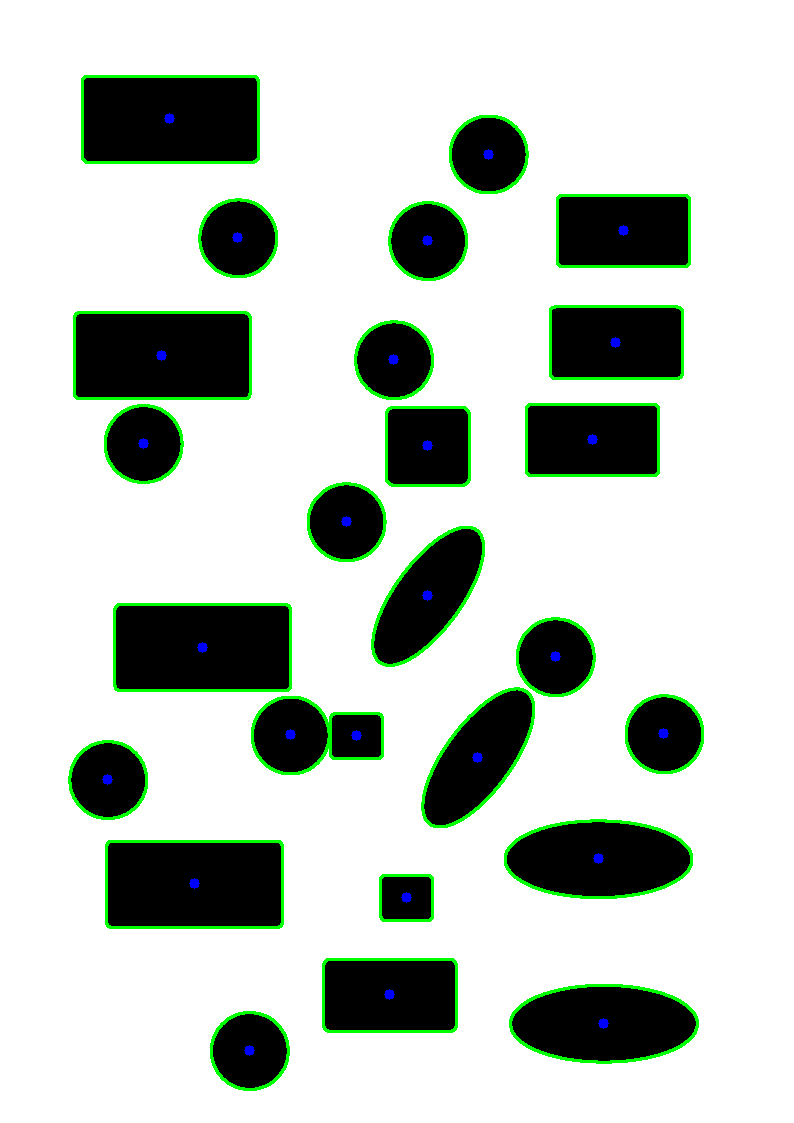

In [13]:

# Load the image
image = cv2.imread('contours.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to get a binary image
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Get the image dimensions
height, width = binary.shape

# Define a minimum area threshold to filter out small contours
min_area_threshold = 100

# Counter for valid contours
valid_contour_index = 1

# Loop through each contour and calculate the centroid and area
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # Filter out small contours based on the area threshold(avoiding noise)
    if area < min_area_threshold:
        continue

    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Check if the contour is the border of the image
    if x == 0 or y == 0 or x + w == width or y + h == height:
        continue

    # Calculate the moments of the contour
    M = cv2.moments(contour)

    # Calculate the centroid
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Print the centroid and area
    print(f"Contour {valid_contour_index}: Centroid = ({cX}, {cY}), Area = {area}")

    # Increment the valid contour index
    valid_contour_index += 1

    # Draw the contours and centroids on the image for visualization
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    cv2.circle(image, (cX, cY), 5, (255, 0, 0), -1)

# Display the image with contours and centroids
cv2_imshow(image)
